# Learning Points & Summary

Congratulations on completing another challenging data science project! Today we've seen how to grab some raw data and create some interesting charts using Pandas and Matplotlib. We've

* used `.groupby()` to explore the number of posts and entries per programming language

* converted strings to Datetime objects with `to_datetime()` for easier plotting

* reshaped our DataFrame by converting categories to columns using `.pivot()`

* used `.count()` and `isna().values.any()` to look for `NaN` values in our DataFrame, which we then replaced using `.fillna()`

* created (multiple) line charts using `.plot()` with a for-loop

* styled our charts by changing the size, the labels, and the upper and lower bounds of our axis.

* added a legend to tell apart which line is which by colour

* smoothed out our time-series observations with `.rolling().mean()` and plotted them to better identify trends over time.

## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

New (better) query: 

```
select 
  dateadd(month, datediff(month, 0, q.CreationDate), 0) as month_start_date
  , TagName as language_tag
  , count(*) as post_count
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php',
'perl','ruby','visual basic','r','object-c','scratch','go','swift','delphi',
'fortran','lua','rust','cobol','julia')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
```

## Import Statements

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [26]:
df = pd.read_csv('stack_exchange_languages_data.csv')
df.rename(columns = {'tag_name': 'language_tag'}, inplace=True)
df

,month_start_date,language_tag,usage_count
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c++,164
3,2008-08-01 00:00:00,c#,506
4,2008-08-01 00:00:00,c,83
...,...,...,...
3215,2022-06-01 00:00:00,perl,128
3216,2022-06-01 00:00:00,r,4524
3217,2022-06-01 00:00:00,ruby,491
3218,2022-06-01 00:00:00,rust,729


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [9]:
df.head()
df.tail()
# or, just see above :) 

,month_start_date,tag_name,usage_count
3215,2022-06-01 00:00:00,perl,128
3216,2022-06-01 00:00:00,r,4524
3217,2022-06-01 00:00:00,ruby,491
3218,2022-06-01 00:00:00,rust,729
3219,2022-06-01 00:00:00,swift,1862


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [10]:
df.shape

(3220, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [28]:
df.count()

month_start_date    3220
language_tag        3220
usage_count         3220
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [27]:
df.groupby('language_tag').sum('usage_count').sort_values('usage_count', ascending=False)

,usage_count
language_tag,
javascript,2388130
python,1970205
java,1850111
c#,1543713
php,1437194
c++,768076
r,453478
c,381262
swift,314420


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [38]:
df.groupby('language_tag', as_index=False)['month_start_date'].nunique().rename(columns={'month_start_date':'months_of_data'}).sort_values('months_of_data')

,language_tag,months_of_data
10,julia,120
17,rust,122
7,go,152
19,swift,159
4,cobol,164
15,r,165
18,scala,166
16,ruby,167
14,python,167
13,php,167


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [39]:
df.month_start_date[1]

'2008-08-01 00:00:00'

In [40]:
type(df.month_start_date[1])

str

In [45]:
df.month_start_date = pd.to_datetime(df.month_start_date)
df.head()

,month_start_date,language_tag,usage_count
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c++,164
3,2008-08-01,c#,506
4,2008-08-01,c,83


## Data Manipulation



In [47]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
pivoted_df = test_df.pivot(index='Age', columns='Actor', values='Power')
pivoted_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [48]:
reshaped_df = df.pivot(index='month_start_date', columns='language_tag', values='usage_count')
reshaped_df

language_tag,assembly,c,c#,c++,cobol,delphi,fortran,go,java,javascript,julia,lua,perl,php,python,r,ruby,rust,scala,swift
month_start_date,,,,,,,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,506.0,164.0,NaN,14.0,1.0,NaN,222.0,164.0,NaN,1.0,28.0,159.0,120.0,NaN,70.0,NaN,NaN,NaN
2008-09-01,28.0,318.0,1647.0,753.0,5.0,104.0,3.0,NaN,1133.0,637.0,NaN,11.0,130.0,477.0,537.0,6.0,287.0,NaN,6.0,NaN
2008-10-01,15.0,303.0,1989.0,809.0,3.0,112.0,3.0,NaN,1150.0,724.0,NaN,12.0,127.0,612.0,508.0,NaN,247.0,NaN,7.0,NaN
2008-11-01,17.0,259.0,1732.0,734.0,1.0,141.0,4.0,NaN,957.0,581.0,NaN,9.0,97.0,502.0,452.0,1.0,159.0,NaN,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,225.0,1788.0,5822.0,3477.0,5.0,188.0,53.0,688.0,7266.0,15437.0,129.0,141.0,97.0,3715.0,22606.0,4338.0,456.0,518.0,389.0,1879.0
2022-03-01,251.0,2101.0,6473.0,3842.0,12.0,134.0,52.0,828.0,8104.0,16340.0,134.0,152.0,105.0,3765.0,24559.0,5084.0,528.0,574.0,428.0,2072.0
2022-04-01,266.0,1875.0,5955.0,3857.0,7.0,122.0,56.0,757.0,7857.0,16010.0,119.0,168.0,101.0,3823.0,23619.0,4779.0,494.0,590.0,393.0,1774.0


In [54]:
print(reshaped_df.shape)


(168, 20)


In [53]:
print(reshaped_df.columns)

Index(['assembly', 'c', 'c#', 'c++', 'cobol', 'delphi', 'fortran', 'go',
       'java', 'javascript', 'julia', 'lua', 'perl', 'php', 'python', 'r',
       'ruby', 'rust', 'scala', 'swift'],
      dtype='object', name='language_tag')


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [57]:
reshaped_df.count()

language_tag
assembly      167
c             167
c#            168
c++           167
cobol         164
delphi        167
fortran       167
go            152
java          167
javascript    167
julia         120
lua           167
perl          167
php           167
python        167
r             165
ruby          167
rust          122
scala         166
swift         159
dtype: int64

In [61]:
reshaped_df.fillna(0, inplace=True)
reshaped_df.isna().values.any()  # check if any values are NaN

False

In [59]:
reshaped_df.head()

language_tag,assembly,c,c#,c++,cobol,delphi,fortran,go,java,javascript,julia,lua,perl,php,python,r,ruby,rust,scala,swift
month_start_date,,,,,,,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,506.0,164.0,0.0,14.0,1.0,0.0,222.0,164.0,0.0,1.0,28.0,159.0,120.0,0.0,70.0,0.0,0.0,0.0
2008-09-01,28.0,318.0,1647.0,753.0,5.0,104.0,3.0,0.0,1133.0,637.0,0.0,11.0,130.0,477.0,537.0,6.0,287.0,0.0,6.0,0.0
2008-10-01,15.0,303.0,1989.0,809.0,3.0,112.0,3.0,0.0,1150.0,724.0,0.0,12.0,127.0,612.0,508.0,0.0,247.0,0.0,7.0,0.0
2008-11-01,17.0,259.0,1732.0,734.0,1.0,141.0,4.0,0.0,957.0,581.0,0.0,9.0,97.0,502.0,452.0,1.0,159.0,0.0,5.0,0.0


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

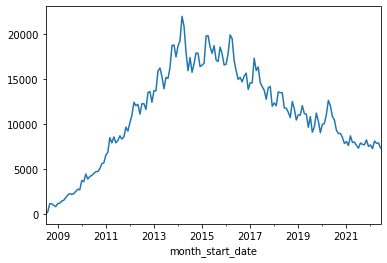

In [67]:
# plt.plot(reshaped_df.index, reshaped_df.java)
reshaped_df.java.plot()

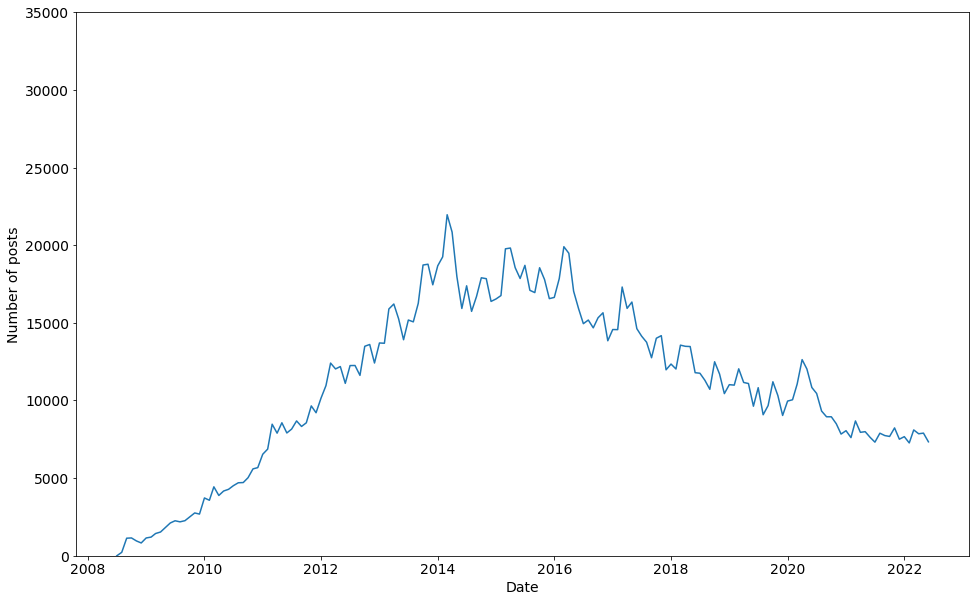

In [70]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 35000)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.plot(reshaped_df.index, reshaped_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

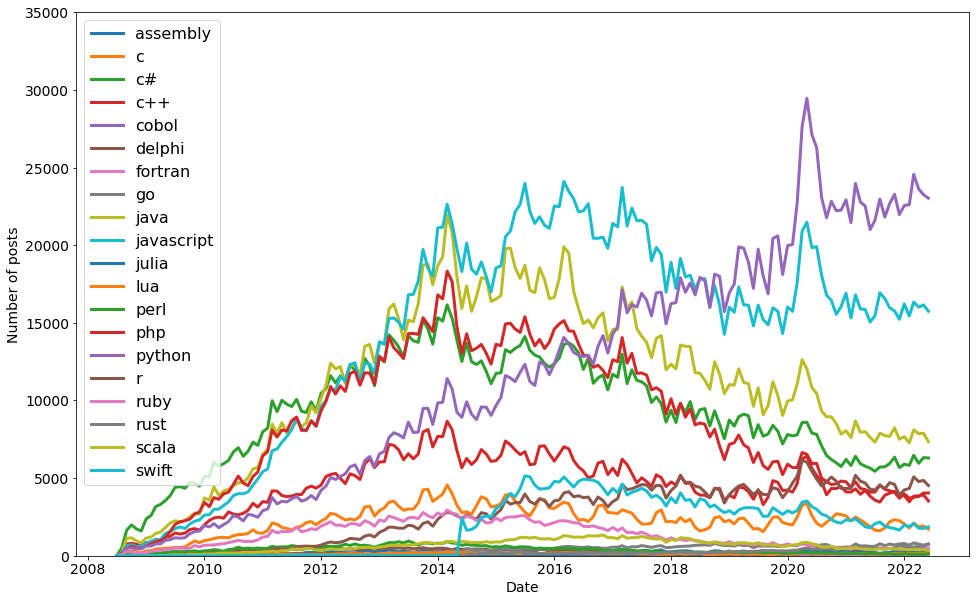

In [75]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 35000)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[column], 
           linewidth=3, label=reshaped_df[column].name)
  plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

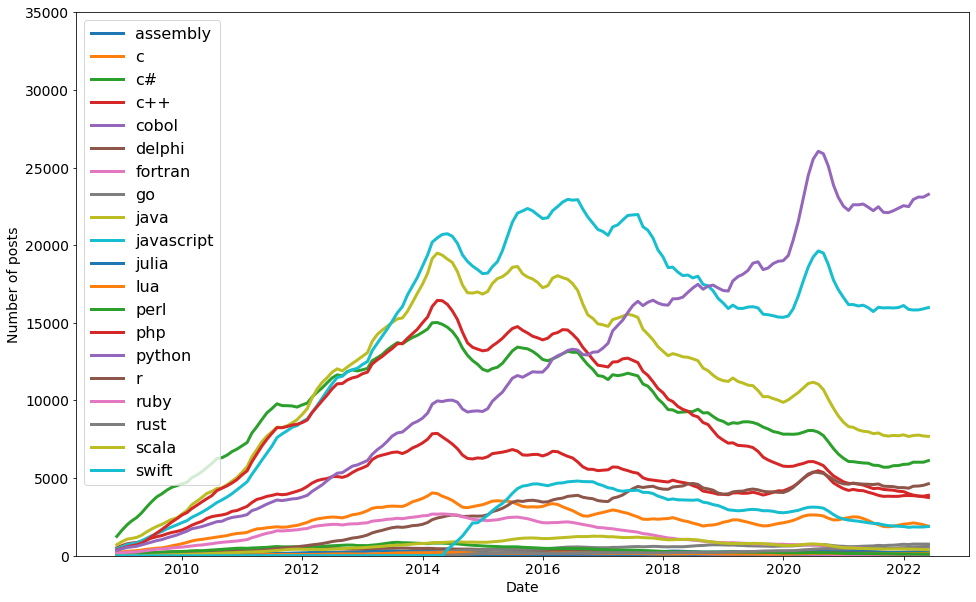

In [76]:
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 35000)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
for column in roll_df.columns:
  plt.plot(roll_df.index, roll_df[column], 
           linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=16)

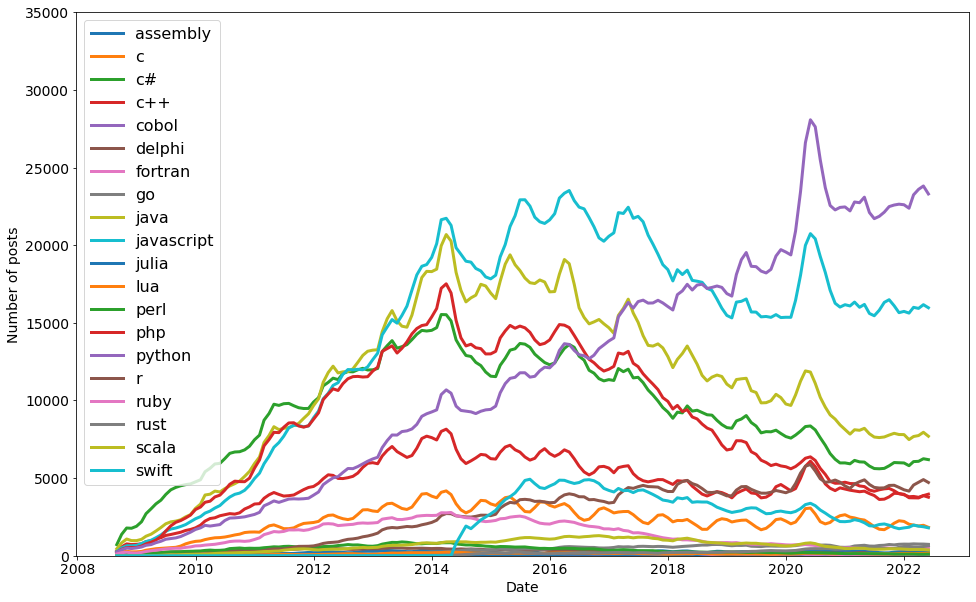

In [77]:
roll_df = reshaped_df.rolling(window=3).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 35000)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
for column in roll_df.columns:
  plt.plot(roll_df.index, roll_df[column], 
           linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=16)

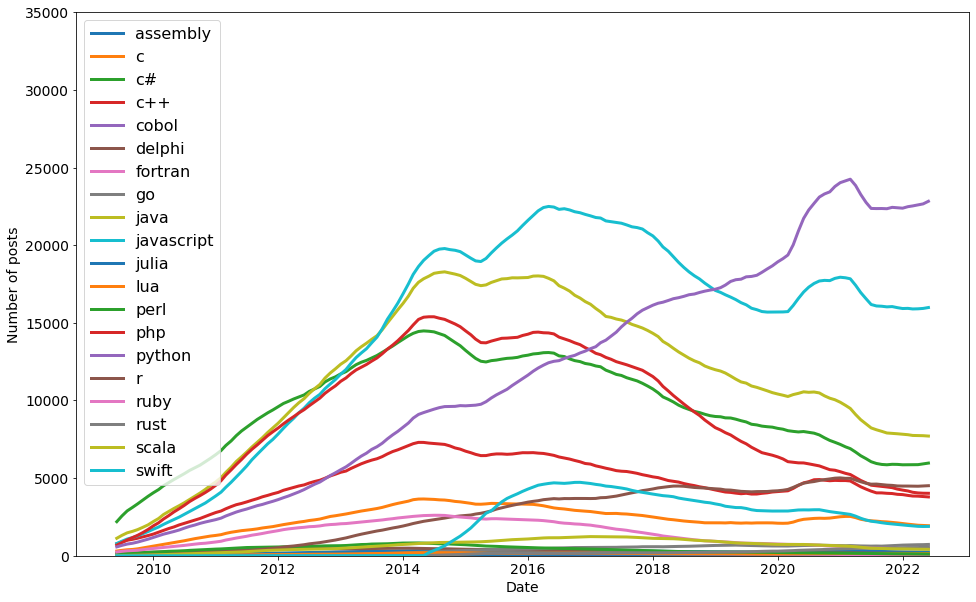

In [78]:
roll_df = reshaped_df.rolling(window=12).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 35000)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
for column in roll_df.columns:
  plt.plot(roll_df.index, roll_df[column], 
           linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=16)